In [1]:
using PyPlot
include("../src/fdfd_local_field.jl")

┌ Warning: PyPlot is using tkagg backend, which is known to cause crashes on MacOS (#410); use the MPLBACKEND environment variable to request a different backend.
└ @ PyPlot /Users/raphaelpestourie/.julia/packages/PyPlot/XHEG0/src/init.jl:192


get_val_gradient_from_data (generic function with 1 method)

In [2]:
wavelengths = Float64[488, 532, 658]
lb = .15
ub = .85

### simulations
# reference simulation
refractive_indexes_ref = ones(3) * 1.45
ref_local_field = Dict()
for j in eachindex(wavelengths)
    ref_local_field[wavelengths[j]] = get_local_field(Float64[0.5], refractive_indexes=refractive_indexes_ref, frequency=wavelengths[j]/wavelengths[1])[3]
end

# simulations
refractive_indexes_sim = Float64[1.0, 1.0, 1.45]
ps = .15:0.01:0.85
local_field_data = zeros(ComplexF64, (length(ps), length(wavelengths)))

for (j, lambda) in enumerate(wavelengths)
    for (i, p) in enumerate(ps)
        freq = wavelengths[1]/wavelengths[j]
        local_field_data[i,j] = get_local_field([p], refractive_indexes=refractive_indexes_sim, frequency=freq)[3]/ref_local_field[wavelengths[j]]
    end
end

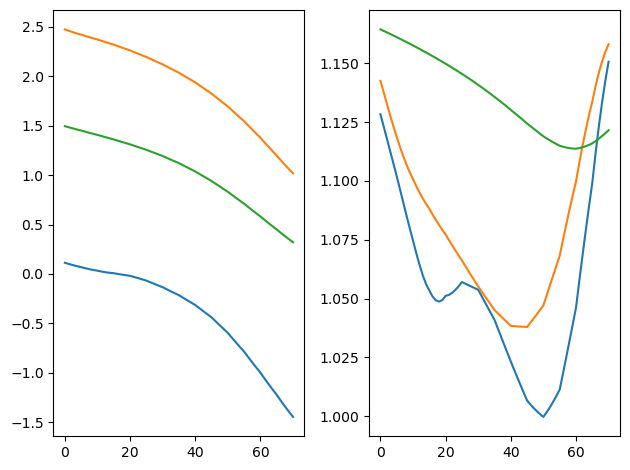

In [4]:
subplot(121)
plot(angle.(local_field_data))
subplot(122)
plot(abs.(local_field_data));
tight_layout()

In [20]:
# writedlm("RGB_uc_data.csv", hcat(ps, real.(local_field_data), imag.(local_field_data)), ',')